In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import warnings # biblioteca que permite tirar os avisos da celula do notebook
import plotly.express as px

In [59]:
dados_clientes = r'C:\Users\dsadm\Desktop\Caua\AulasBigData\Aula10\zoop_clientes.csv'
dados_vendas = r'C:\Users\dsadm\Desktop\Caua\AulasBigData\Aula10\zoop_vendas.csv'

In [60]:
clientes = pd.read_csv(dados_clientes) # Ler os dados

clientes.head() # Mostrar os dados

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [61]:
vendas = pd.read_csv(dados_vendas) # Ler os dados

vendas.head() # Mostrar os dados

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [62]:
clientes.info() # Mostrar informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [63]:
clientes.describe() # Mostrar a descrição dos dados

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [64]:
vendas.info() # Mostrar informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [65]:
vendas.describe() # Mostrar a descrição dos dados

,ID_compra,preco_unitario,quantidade,frete
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [66]:
# Contagem de clientes por sexo
clientes['sexo_biologico'].value_counts()    

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [67]:
# Média de idade dos clientes
clientes['idade'].mean()

38.2600097260496

In [68]:
# Contagem de clientes por região
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [69]:
# Avaliação média de compras
clientes['avaliacao_compra'].mean()

8.44366996271681

In [70]:
# Verificando a participação no cashback
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

In [71]:
# Transformando a data de object para datetime64
vendas["data"] = pd.to_datetime(vendas["data"], format="%Y-%m-%d")

In [72]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [73]:
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [74]:
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [75]:
# Preço médio unitário dos produtos 
vendas['preco_unitario'].mean()

873.2347382071648

In [76]:
# Quantidade total de produtos vendidos 
vendas['quantidade'].sum()

18537

In [77]:
# Valor total do frete arrecadado
vendas['frete'].sum()

735553.51

In [78]:
# Métodos de pagamento utilizados e suas frequências
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: count, dtype: int64

In [79]:
df = pd.merge(vendas,clientes, on='ID_compra')

In [80]:
# Organizando as colunas
colunas_organizadas = [
    "ID_compra", "data", "horario", "categoria", "preco_unitario",
    "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade",
    "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra"
]

df = df[colunas_organizadas]

In [81]:
# Verificação do dataframe
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


Tabela 'metodos_de_pagamento' :
  Metodo de Pagamento  Quantidade
0   Cartão de Crédito        2851
1                 PIX        2244
2    Cartão de Débito         547
3              Boleto         527


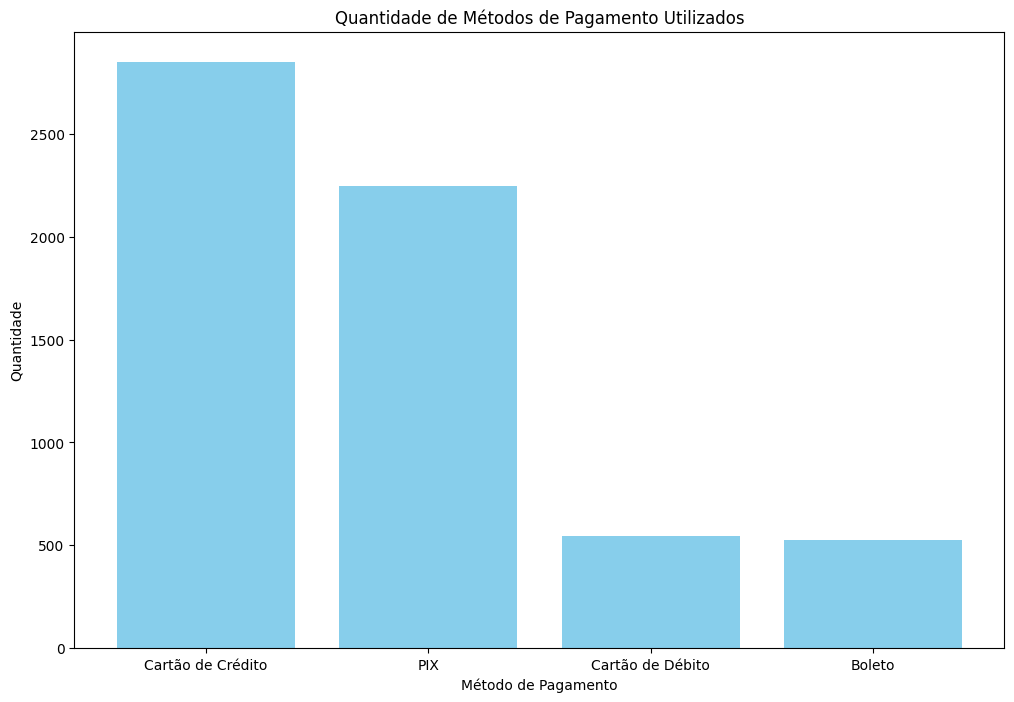

In [82]:
# Criar a tabela "metodos_de_pagamento"
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo de Pagamento', 'Quantidade']

# Visualização

plt.figure(figsize=(12,8))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=0, ha='center')

# Exibir a tabela
print("Tabela 'metodos_de_pagamento' :")
print(metodos_de_pagamento)

# Exibir o gráfico
plt.show()

In [83]:

# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc","#555655", "#231f20",
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

In [85]:
#Calculando o faturamento por categoria
df['faturamento'] = (df['preco_unitario']*df['quantidade'])+df['frete']

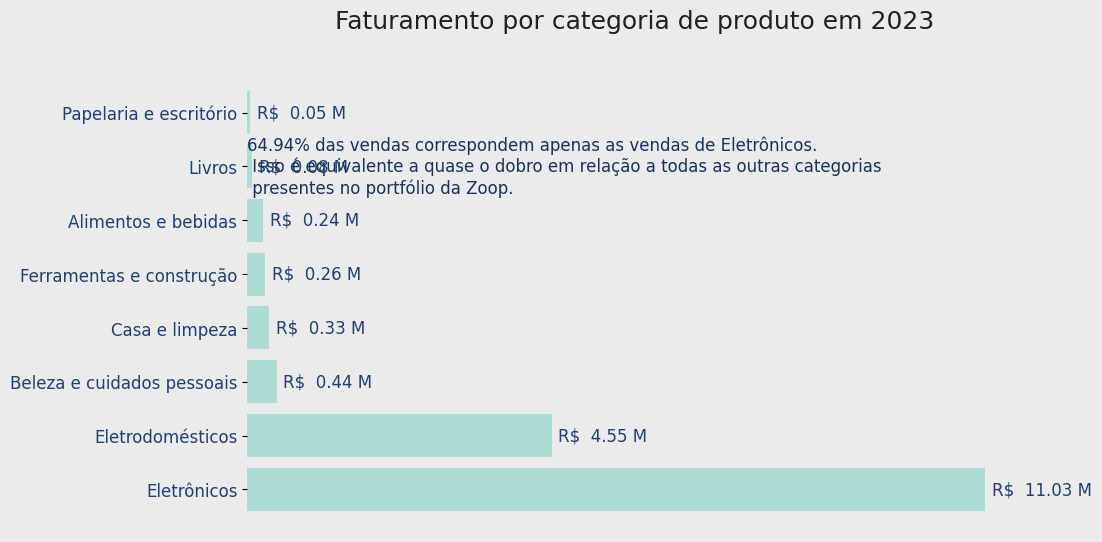

In [86]:
# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().sort_values(ascending=False)

# Calcular percentual 
total_faturamento = faturamento_por_categoria.sum()
percentual = faturamento_por_categoria.iloc[0] / total_faturamento * 100

# Configurações do gráfico 
plt.figure(figsize=(10,6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
bars = plt.barh(faturamento_por_categoria.index, faturamento_por_categoria, color=AQUA_1)

# Adicionar rótulos e título

plt.title('Faturamento por categoria de produto em 2023', fontsize=18, pad=30, color=CINZA_5)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=12, color=AZUL_1)
plt.xticks([])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Adicional total do faturamento
for bar in bars:
    plt.text(bar.get_width() + 1e5, bar.get_y() + bar.get_height()/2, f'R$ {bar.get_width()/1e6: .2f} M', ha='left', va='center', color=AZUL_1, fontsize=12)
    
# Adicionar texto dentro da área do plot
plt.text(0.4, 6, f'{percentual:.2f}% das vendas correspondem apenas as vendas de Eletrônicos.\n Isso é equivalente a quase o dobro em relação a todas as outras' + ' categorias \n presentes no portfólio da Zoop.',
         ha='left', va='center', color=AZUL_3, fontsize=12)

# Exibir o gráfico
plt.show()


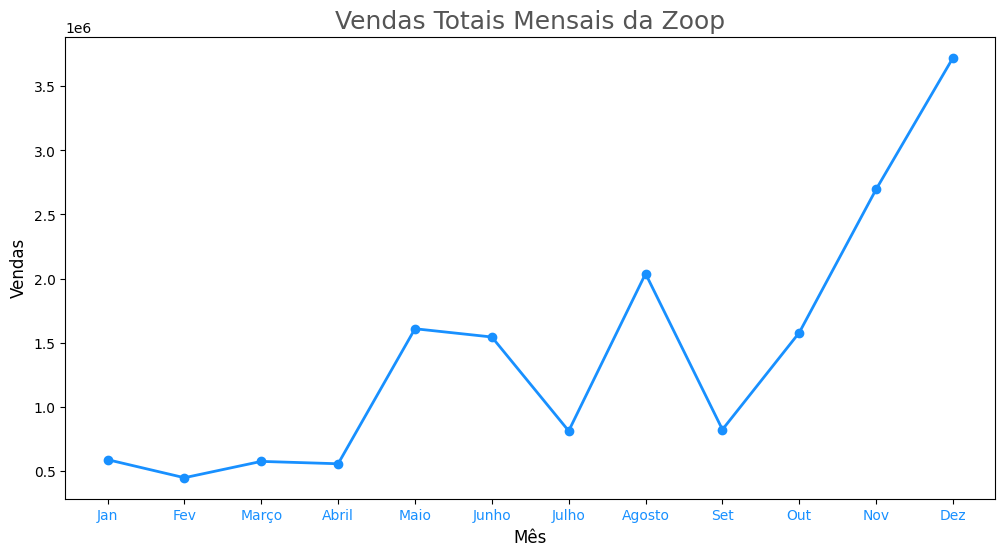

In [87]:
#Dicionario dos meses
meses = {
    'January':'Jan',
    'February':'Fev',
    'March':'Março',
    'April':'Abril',
    'May':'Maio',
    'June':'Junho',
    'July':'Julho',
    'August':'Agosto',
    'September':'Set',
    'October':'Out',
    'November':'Nov',
    'December':'Dez'
    }
#Agrupando por mes as vendas
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())
# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10,
            color='#1890FF')

# Exibir o gráfico
plt.show()